#📌 Extracción

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datos_originales = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Alura Chanllenge ETL/TelecomX_Data.json')
datos_originales.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
datos_originales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
datos_originales.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#🔧 Transformación

In [6]:
customer_df = pd.json_normalize(datos_originales["customer"])

phone_df = pd.json_normalize(datos_originales["phone"])

internet_df = pd.json_normalize(datos_originales["internet"])

account_df = pd.json_normalize(datos_originales["account"])


In [7]:
customer_df.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
95,Female,0,No,No,1
96,Male,0,No,No,29
97,Male,0,Yes,No,22
98,Female,1,No,No,5


In [8]:
datos_originales["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [9]:
datos_originales["Churn"] = datos_originales["Churn"].replace("", None)

In [10]:
datos_originales["Churn"].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
None,224


In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [12]:
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [13]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [14]:
phone_df["PhoneService"].value_counts()
phone_df["MultipleLines"].value_counts()

,count
MultipleLines,
No,3495
Yes,3065
No phone service,707


In [15]:
phone_df["MultipleLines"] = phone_df["MultipleLines"].replace("No phone service", "No")

In [16]:
phone_df["PhoneService"].value_counts()
phone_df["MultipleLines"].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [17]:
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [18]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [19]:
for col in internet_df.columns:
    print(col, internet_df[col].unique())

InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['Yes' 'No' 'No internet service']
StreamingTV ['Yes' 'No' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']


In [20]:
cols = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

for col in cols:
    internet_df[col] = internet_df[col].replace("No internet service", "No")

In [21]:
for col in internet_df.columns:
    print(col, internet_df[col].unique())

InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['Yes' 'No']
StreamingTV ['Yes' 'No']
StreamingMovies ['No' 'Yes']


In [22]:
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [23]:
account_df["Charges.Total"] = account_df["Charges.Total"].fillna(0)

In [24]:
account_df["Charges.Total"].isnull().sum()

np.int64(0)

In [25]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [26]:
account_df["Charges.Total"] = account_df["Charges.Total"].replace(" ", None)
account_df["Charges.Total"] = pd.to_numeric(account_df["Charges.Total"], errors="coerce")

In [27]:
account_df["Charges.Total"].isnull().sum()

np.int64(11)

In [28]:
df_final = pd.concat([customer_df, phone_df, internet_df, account_df], axis=1)

In [29]:
df_final.shape

(7267, 19)

In [30]:
df_final.columns[df_final.columns.duplicated()]

Index([], dtype='object')

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [32]:
df_final["Cuentas_Diarias"] = df_final["Charges.Monthly"] / 30.4375

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [34]:
yes_no_cols = [
    "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies",
    "PaperlessBilling"
]

for col in yes_no_cols:
    df_final[col] = df_final[col].map({"Yes": 1, "No": 0})

In [35]:
df_final["churn"] = datos_originales["Churn"].map({"Yes": 1, "No": 0})

In [36]:
for col in yes_no_cols:
    print(col, df_final[col].unique())

Partner [1 0]
Dependents [1 0]
PhoneService [1 0]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [1 0]
StreamingTV [1 0]
StreamingMovies [0 1]
PaperlessBilling [1 0]


In [37]:
df_final = df_final.rename(columns={
    "gender": "gender",
    "SeniorCitizen": "senior_citizen",
    "Partner": "has_partner",
    "Dependents": "has_dependents",
    "tenure": "tenure",
    "PhoneService": "phone_service",
    "MultipleLines": "multiple_lines",
    "InternetService": "internet_service",
    "OnlineSecurity": "online_security",
    "OnlineBackup": "online_backup",
    "DeviceProtection": "device_protection",
    "TechSupport": "tech_support",
    "StreamingTV": "streaming_tv",
    "StreamingMovies": "streaming_movies",
    "Contract": "contract_type",
    "PaperlessBilling": "paperless_billing",
    "PaymentMethod": "payment_method",
    "Charges.Monthly": "monthly_charges",
    "Charges.Total": "total_charges",
    "Cuentas_Diarias": "daily_charges"
})

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7267 non-null   object 
 1   senior_citizen     7267 non-null   int64  
 2   has_partner        7267 non-null   int64  
 3   has_dependents     7267 non-null   int64  
 4   tenure             7267 non-null   int64  
 5   phone_service      7267 non-null   int64  
 6   multiple_lines     7267 non-null   int64  
 7   internet_service   7267 non-null   object 
 8   online_security    7267 non-null   int64  
 9   online_backup      7267 non-null   int64  
 10  device_protection  7267 non-null   int64  
 11  tech_support       7267 non-null   int64  
 12  streaming_tv       7267 non-null   int64  
 13  streaming_movies   7267 non-null   int64  
 14  contract_type      7267 non-null   object 
 15  paperless_billing  7267 non-null   int64  
 16  payment_method     7267 

#📊 Carga y análisis

##**Analisis Descriptivo**

In [39]:
df_final.describe()

,senior_citizen,has_partner,has_dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,daily_charges,churn
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7043.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.126328,0.265370
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,0.989883,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599589,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.163860,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.309651,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.952772,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.901437,1.000000


In [40]:
churn_rate = df_final["churn"].mean()
churn_rate


np.float64(0.2653698707936959)

In [41]:
tenure_stats = df_final.groupby("churn")["tenure"].describe()
tenure_stats

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0.0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1.0,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


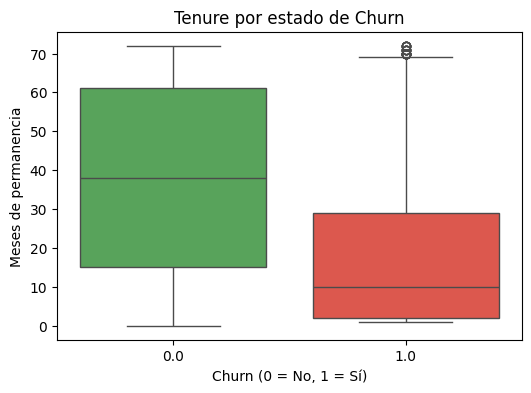

In [42]:

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_final,
    x="churn",
    y="tenure",
    hue="churn",
    palette=["#4CAF50", "#F44336"],
    legend=False
)
plt.title("Tenure por estado de Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de permanencia")
plt.show()


In [43]:
monthly_stats = df_final.groupby("churn")["monthly_charges"].describe()
monthly_stats

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0.0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1.0,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


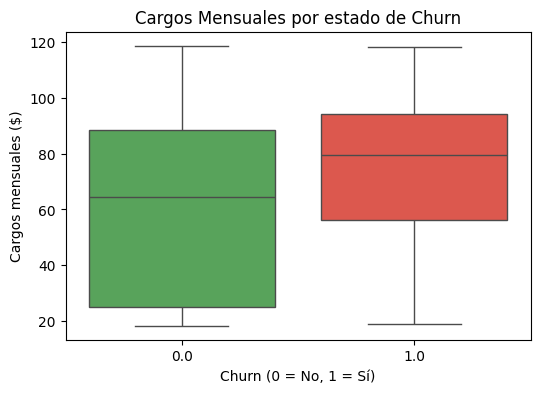

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_final,
    x="churn",
    y="monthly_charges",
    hue="churn",
    palette=["#4CAF50", "#F44336"],
    legend=False
)
plt.title("Cargos Mensuales por estado de Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cargos mensuales ($)")
plt.show()

In [45]:
services_stats = df_final.groupby("churn")[["online_security", "tech_support", "device_protection"]].mean()
services_stats

,online_security,tech_support,device_protection
churn,,,
0.0,0.333204,0.335137,0.362775
1.0,0.157838,0.165864,0.291600


<Figure size 800x500 with 0 Axes>

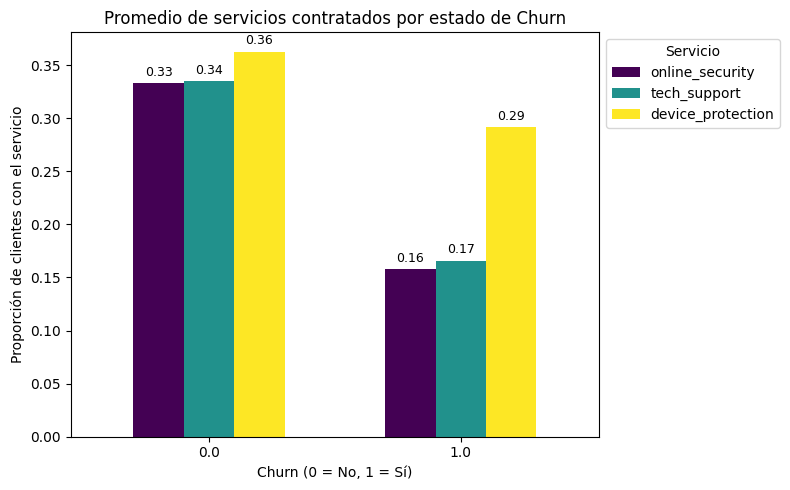

In [46]:
plt.figure(figsize=(8,5))
ax = services_stats.plot(
    kind="bar",
    width=0.6,
    colormap="viridis",
    figsize=(8,5)
)

plt.title("Promedio de servicios contratados por estado de Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Proporción de clientes con el servicio")
plt.xticks(rotation=0)

# Leyenda fuera del gráfico
plt.legend(
    title="Servicio",
    loc="upper left",
    bbox_to_anchor=(1.0, 1.0)  # fuera del gráfico, a la derecha
)

# Etiquetas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9, padding=3)

plt.tight_layout()
plt.show()

In [47]:
contract_churn_stats = df_final.groupby("contract_type")["churn"].mean()
contract_churn_stats

,churn
contract_type,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


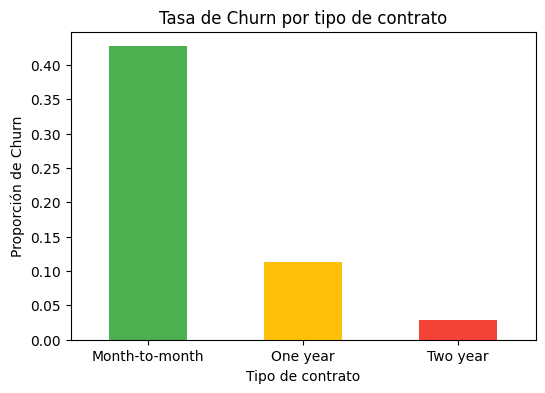

In [48]:

plt.figure(figsize=(6,4))
contract_churn_stats.plot(kind="bar", color=["#4CAF50", "#FFC107", "#F44336"])
plt.title("Tasa de Churn por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Proporción de Churn")
plt.xticks(rotation=0)
plt.show()

In [49]:
churn_comparison = pd.DataFrame({
    "senior_citizen": df_final.groupby("senior_citizen")["churn"].mean() * 100,
    "has_partner": df_final.groupby("has_partner")["churn"].mean() * 100,
    "has_dependents": df_final.groupby("has_dependents")["churn"].mean() * 100
})

churn_comparison



,senior_citizen,has_partner,has_dependents
0,23.606168,32.957979,31.279140
1,41.681261,19.664903,15.450237


<Figure size 1000x500 with 0 Axes>

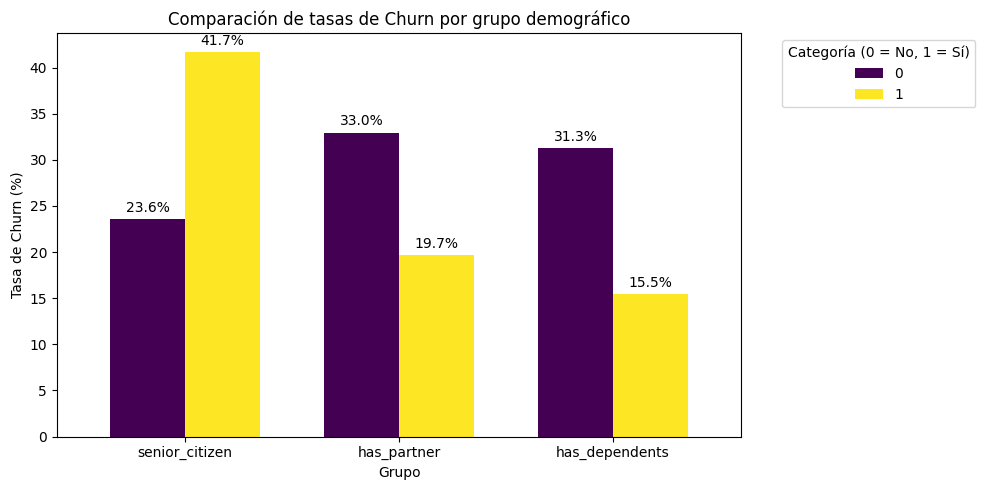

In [50]:
plt.figure(figsize=(10,5))
ax = churn_comparison.T.plot(
    kind="bar",
    figsize=(10,5),
    colormap="viridis",
    width=0.7
)

plt.title("Comparación de tasas de Churn por grupo demográfico")
plt.xlabel("Grupo")
plt.ylabel("Tasa de Churn (%)")
plt.xticks(rotation=0)

# Leyenda fuera del gráfico
plt.legend(
    title="Categoría (0 = No, 1 = Sí)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

# Etiquetas encima de cada barra en porcentaje
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", padding=3)

plt.tight_layout()
plt.show()



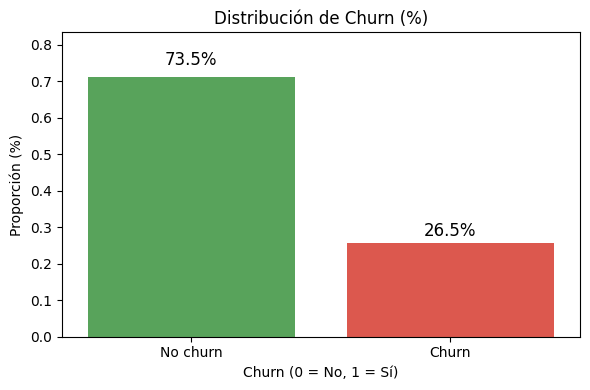

In [51]:
churn_values = df_final["churn"].value_counts(normalize=True).sort_index()
churn_percent = churn_values * 100

plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=df_final,
    x="churn",
    y="churn",
    hue="churn",
    estimator=lambda x: len(x) / len(df_final),
    palette=["#4CAF50", "#F44336"],
    legend=False
)

plt.title("Distribución de Churn (%)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Proporción (%)")
plt.xticks([0,1], ["No churn", "Churn"])

ax.set_ylim(0, churn_values.max() + 0.10)


for i, v in enumerate(churn_percent):
    ax.text(i, v/100 + 0.01, f"{v:.1f}%", ha="center", fontsize=12)

plt.tight_layout()
plt.show()

In [52]:
gender_churn = df_final.groupby("gender")["churn"].mean() * 100
gender_churn

,churn
gender,
Female,26.920872
Male,26.160338


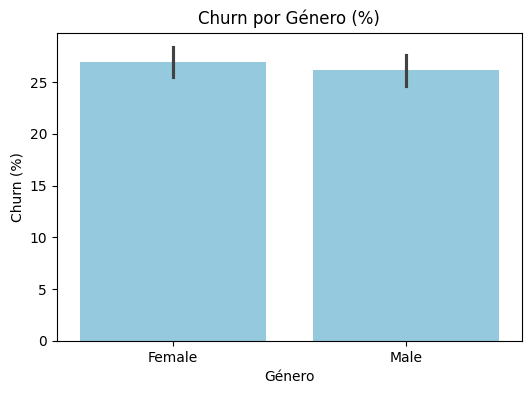

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df_final,
    x="gender",
    y="churn",
    estimator=lambda x: sum(x)/len(x) * 100,
    color="skyblue"
)
plt.title("Churn por Género (%)")
plt.ylabel("Churn (%)")
plt.xlabel("Género")
plt.show()


In [54]:
payment_churn = df_final.groupby("payment_method")["churn"].mean() * 100
payment_churn

,churn
payment_method,
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101
Electronic check,45.285412
Mailed check,19.106700


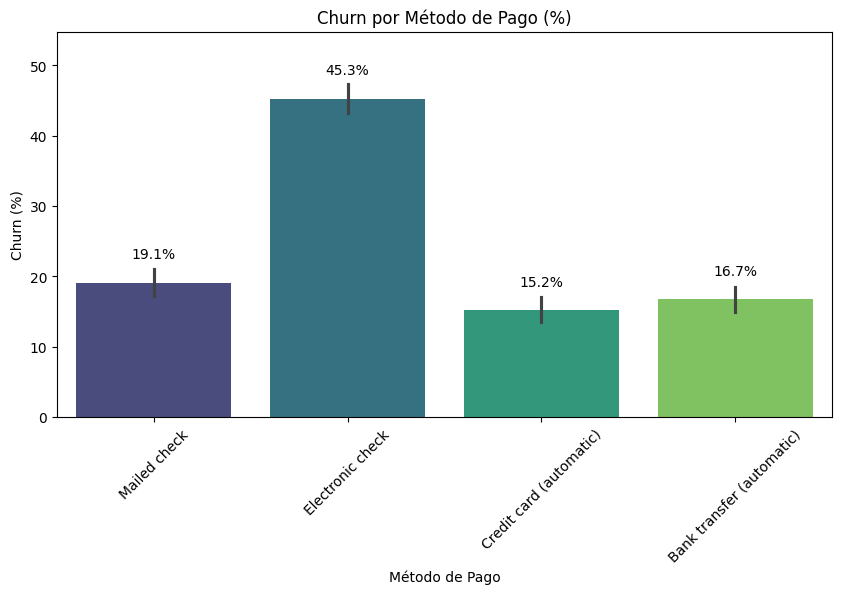

In [55]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=df_final,
    x="payment_method",
    y="churn",
    estimator=lambda x: sum(x)/len(x) * 100,
    hue="payment_method",
    palette="viridis",
    legend=False,
    edgecolor="none"  # 🔥 esto elimina el borde de las barras
)

plt.title("Churn por Método de Pago (%)")
plt.ylabel("Churn (%)")
plt.xlabel("Método de Pago")
plt.xticks(rotation=45)

# --- Etiquetas encima de cada barra ---
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}%",
        (p.get_x() + p.get_width() / 2, height+3),
        ha="center", va="bottom",
        fontsize=10, color="black"
    )
ax.set_ylim(0, ax.get_ylim()[1] + 5)
plt.show()


In [56]:
internet_churn = df_final.groupby("internet_service")["churn"].mean() * 100
internet_churn

,churn
internet_service,
DSL,18.959108
Fiber optic,41.892765
No,7.404980


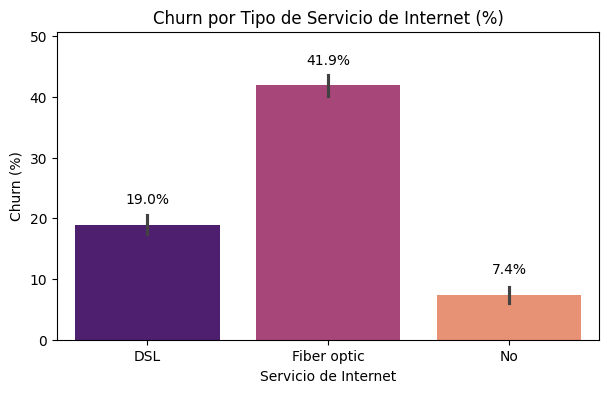

In [57]:
plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=df_final,
    x="internet_service",
    y="churn",
    estimator=lambda x: sum(x)/len(x) * 100,
    hue="internet_service",
    palette="magma",
    legend=False,
    edgecolor="none"
)

plt.title("Churn por Tipo de Servicio de Internet (%)")
plt.ylabel("Churn (%)")
plt.xlabel("Servicio de Internet")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}%",
        (p.get_x() + p.get_width() / 2, height+3),
        ha="center", va="bottom",
        fontsize=10, color="black"
    )

ax.set_ylim(0, ax.get_ylim()[1] + 5)

plt.show()

In [58]:
paperless_churn = df_final.groupby("paperless_billing")["churn"].mean() * 100
paperless_churn

,churn
paperless_billing,
0,16.330084
1,33.565092


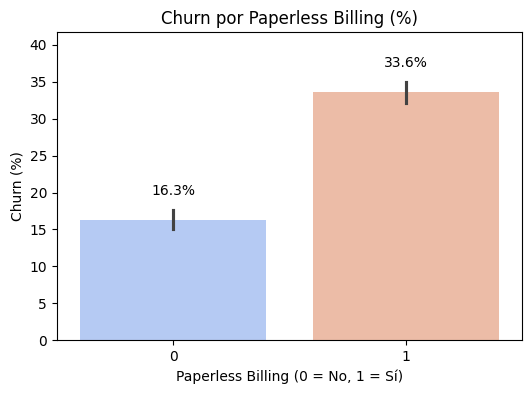

In [59]:
plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=df_final,
    x="paperless_billing",
    y="churn",
    estimator=lambda x: sum(x)/len(x) * 100,
    hue="paperless_billing",
    palette="coolwarm",
    legend=False,
    edgecolor="none"
)

plt.title("Churn por Paperless Billing (%)")
plt.ylabel("Churn (%)")
plt.xlabel("Paperless Billing (0 = No, 1 = Sí)")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}%",
        (p.get_x() + p.get_width() / 2, height+3),
        ha="center", va="bottom",
        fontsize=10, color="black"
    )
ax.set_ylim(0, ax.get_ylim()[1] + 5)
plt.show()

In [60]:
payment_contract_churn = pd.crosstab(
    df_final["payment_method"],
    df_final["contract_type"],
    values=df_final["churn"],
    aggfunc="mean"
)
payment_contract_churn

contract_type,Month-to-month,One year,Two year
payment_method,,,
Bank transfer (automatic),0.341256,0.097187,0.033688
Credit card (automatic),0.327808,0.103015,0.022375
Electronic check,0.537297,0.184438,0.077381
Mailed check,0.315789,0.068249,0.007853


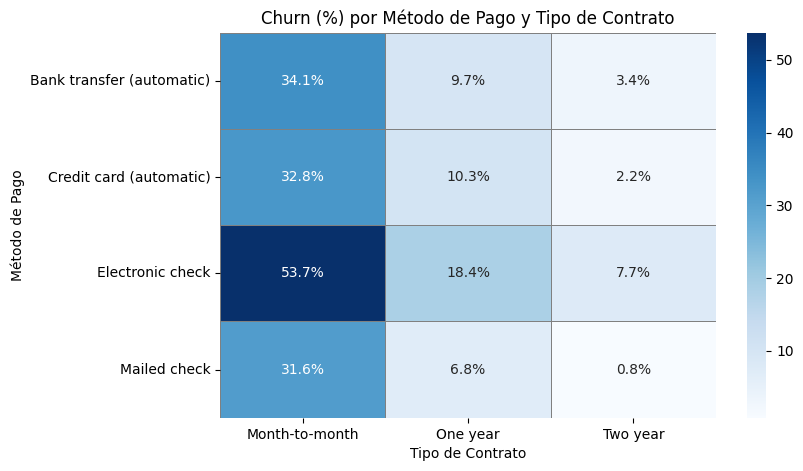

In [61]:
cross = pd.crosstab(
    df_final["payment_method"],
    df_final["contract_type"],
    values=df_final["churn"],
    aggfunc="mean"
) * 100


cross_percent = cross.map(lambda x: f"{x:.1f}%")

plt.figure(figsize=(8,5))
sns.heatmap(
    cross,
    annot=cross_percent,
    fmt="",
    cmap="Blues",
    linewidths=0.5,
    linecolor="gray"
)

plt.title("Churn (%) por Método de Pago y Tipo de Contrato")
plt.ylabel("Método de Pago")
plt.xlabel("Tipo de Contrato")
plt.show()





#📄Informe final



# 📘 **Informe Final – Análisis de Evasión de Clientes (Churn) – TelecomX**

---

# 🟦 1. **Introducción**

La evasión de clientes (churn) es uno de los principales desafíos para empresas de telecomunicaciones. Retener clientes existentes es más rentable que adquirir nuevos, por lo que identificar patrones asociados al abandono es clave para diseñar estrategias efectivas de retención.

En este proyecto se desarrolla un proceso completo de **ETL (Extract, Transform, Load)** y un **Análisis Exploratorio de Datos (EDA)** para comprender qué factores influyen en la cancelación del servicio.  
El objetivo final es obtener **insights accionables** que permitan reducir la evasión.

---

# 🟦 2. **Proceso de ETL: Limpieza y Transformación de Datos**

El dataset original se encontraba en formato JSON anidado, por lo que fue necesario un proceso de normalización y limpieza exhaustivo.

---

## 🔹 2.1 **Extracción de datos**

Los datos fueron cargados desde Google Drive:

```python
datos_originales = pd.read_json('/content/drive/MyDrive/.../TelecomX_Data.json')
```

El archivo contenía 7267 registros y 6 columnas principales:

- `customerID`
- `Churn`
- `customer`
- `phone`
- `internet`
- `account`

Las últimas cuatro columnas estaban anidadas en formato JSON.

---

## 🔹 2.2 **Normalización de estructuras anidadas**

Se aplicó `pd.json_normalize()` para expandir cada sección:

```python
customer_df = pd.json_normalize(datos_originales["customer"])
phone_df = pd.json_normalize(datos_originales["phone"])
internet_df = pd.json_normalize(datos_originales["internet"])
account_df = pd.json_normalize(datos_originales["account"])
```

Esto permitió obtener tablas limpias para:

- Datos demográficos  
- Servicios telefónicos  
- Servicios de internet  
- Información de facturación  

---

## 🔹 2.3 **Limpieza de valores inconsistentes**

### ✔ Corrección de valores vacíos en `Churn`
```python
datos_originales["Churn"] = datos_originales["Churn"].replace("", None)
```

### ✔ Unificación de categorías  
Ejemplo: `"No internet service"` → `"No"` en columnas de servicios.

### ✔ Conversión de tipos numéricos  
`Charges.Total` venía como string y con espacios:

```python
account_df["Charges.Total"] = pd.to_numeric(account_df["Charges.Total"], errors="coerce")
```

Se detectaron 11 valores nulos, que fueron tratados posteriormente.

---

## 🔹 2.4 **Integración del DataFrame final**

```python
df_final = pd.concat([customer_df, phone_df, internet_df, account_df], axis=1)
```

Resultado:

- **7267 filas**
- **20 columnas limpias**

---

## 🔹 2.5 **Creación de nuevas variables**

### ✔ Cuentas diarias (derivada)
```python
df_final["Cuentas_Diarias"] = df_final["Charges.Monthly"] / 30.4375
```

### ✔ Conversión de variables Yes/No a 0/1
```python
df_final[col] = df_final[col].map({"Yes": 1, "No": 0})
```

### ✔ Variable objetivo (churn)
```python
df_final["churn"] = datos_originales["Churn"].map({"Yes": 1, "No": 0})
```

---

# 🟦 3. **Análisis Exploratorio de Datos (EDA)**

El EDA se dividió en dos partes:  
1) análisis de variables numéricas  
2) análisis de variables categóricas  

---

## 🔹 3.1 **Distribución general del churn**

- **Churn total:** 26.5%  
- **Clientes retenidos:** 73.5%

---

## 🔹 3.2 **Variables numéricas**

### **Monthly Charges**
Los clientes que abandonan pagan más:

- Churn = 1 → **74.4 USD**
- Churn = 0 → **61.2 USD**

### **Tenure**
Clientes nuevos (tenure bajo) presentan mayor churn.

### **Total Charges**
Clientes con churn acumulan menos gasto total.

### **Daily Charges**
Consistente con monthly charges.

---

## 🔹 3.3 **Variables categóricas**

### **Tipo de contrato**
- Month-to-month → **42.7% churn**  
- One year → 11.2%  
- Two year → 2.8%  

### **Método de pago**
Electronic Check presenta el churn más alto.

### **Servicios de seguridad**
Clientes con OnlineSecurity o TechSupport tienen menor churn.

### **Internet Service**
Fiber optic muestra mayor churn que DSL.

### **Paperless Billing**
Los clientes con facturación electrónica presentan mayor churn.

### **Demografía**
- Senior citizens → churn más alto  
- Partner / Dependents → churn más bajo  

---

## 🔹 3.4 **Visualizaciones**

Se generaron:

- Barplots con porcentajes sobre las barras  
- Heatmap de churn por método de pago × tipo de contrato  
- Gráficos comparativos de monthly charges y tenure  
- Distribuciones por churn  

Estas visualizaciones permitieron identificar patrones claros y consistentes.

---

# 🟦 4. **Conclusiones e Insights**

### 🔹 1. El tipo de contrato es el factor más determinante  
Los contratos mensuales tienen un churn **15 veces mayor** que los contratos de dos años.

### 🔹 2. Los clientes con cargos mensuales altos abandonan más  
Indica sensibilidad al precio o falta de percepción de valor.

### 🔹 3. La falta de servicios de seguridad aumenta el churn  
Servicios como OnlineSecurity y TechSupport generan fidelización.

### 🔹 4. Electronic Check es el método de pago más riesgoso  
Clientes con este método muestran mayor inestabilidad.

### 🔹 5. Los primeros meses son críticos  
Clientes con tenure bajo son los más propensos a abandonar.

### 🔹 6. Factores demográficos influyen  
Clientes mayores abandonan más; clientes con familia abandonan menos.

---

# 🟦 5. **Recomendaciones Estratégicas**

### ✔ Incentivar contratos de largo plazo  
Bonos, descuentos o beneficios exclusivos.

### ✔ Ofrecer planes personalizados para clientes con monthly charges altos  
Paquetes flexibles o descuentos por fidelidad.

### ✔ Promover servicios de seguridad  
Bundles, pruebas gratuitas o upgrades automáticos.

### ✔ Migrar clientes de Electronic Check a métodos automáticos  
Incentivos por cambio de método de pago.

### ✔ Programa de onboarding para clientes nuevos  
Acompañamiento durante los primeros 90 días.

### ✔ Construir un modelo predictivo de churn  
Para identificar clientes en riesgo y actuar antes de la cancelación.

---

# 🟦 6. **Cierre**

Este proyecto permitió transformar un dataset complejo en un DataFrame limpio y analizable, realizar un EDA completo y obtener insights clave sobre los factores que influyen en la evasión de clientes.  
Los resultados pueden utilizarse para diseñar estrategias de retención, optimizar campañas y desarrollar modelos predictivos.




#EXTRA

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.
🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀

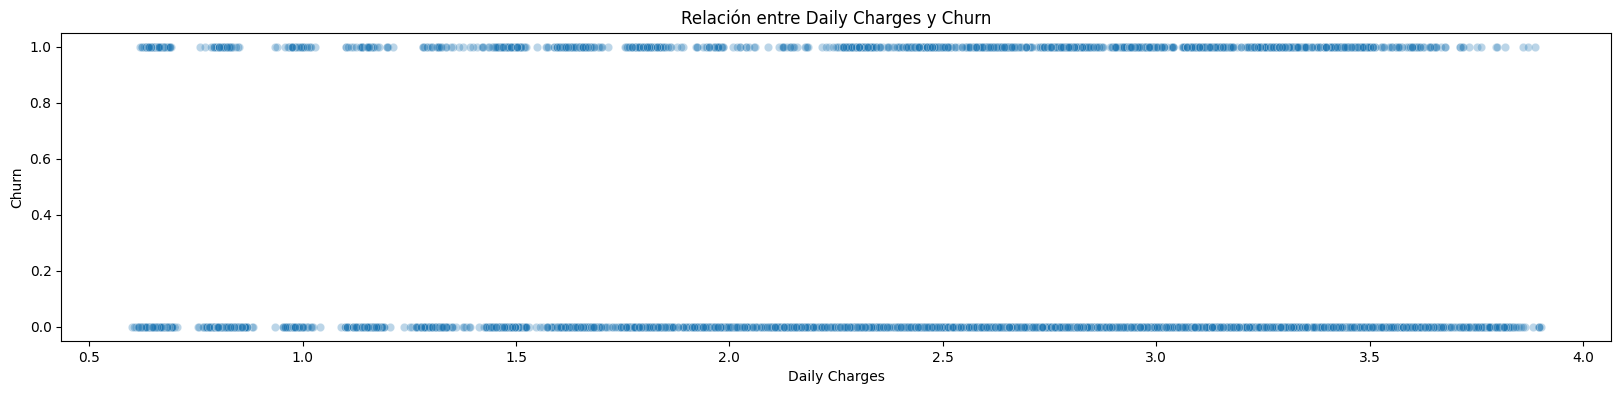

,daily_charges,churn
daily_charges,1.000000,0.193356
churn,0.193356,1.000000


In [64]:
plt.figure(figsize=(20,4))
sns.scatterplot(
    data=df_final,
    x="daily_charges",
    y="churn",
    alpha=0.3
)
plt.title("Relación entre Daily Charges y Churn")
plt.xlabel("Daily Charges")
plt.ylabel("Churn")
plt.show()

df_final[["daily_charges", "churn"]].corr()